In [3]:
from sympy import *
init_printing()

**Inner product**

In [6]:
t = symbols('t')
def inner(f,g, variable = symbols('x')):
    # raise NotImplementedError("Inner product not implemented")
    return integrate(f*conjugate(g),(variable,-1,1))

**Projection**

In [52]:
def orthogonal_projection(x,y,inner: callable):
    return inner(x,y)/inner(y,y)*y

**Gram-Schmidt Algorithm**

In [17]:
def GramSchmidtAlgorithm(v: list, inner: callable, normal = False):
    E = [] #The ortahogonal basis vectors
    for n in range(len(v)):
        if n == 0:
            E.append(v[n])
        else:
            E.append(v[n] - sum([inner(v[n],E[k])/inner(E[k],E[k])*E[k] for k in range(len(E))]))
        if normal:
            E[n] = E[n]/sqrt(inner(E[n],E[n]))
    return Matrix(E)

In [70]:
def GramSchmidt2(B: list, inner: callable, normal = False):
    E = [B[0] / sqrt(inner(B[0],B[0]))] if normal else [B[0]]
    for k in range(1, len(B)):
        v = B[k]
        for j in range(k):
            v -= orthogonal_projection(B[k], E[j], inner)
        if normal:
            v /= sqrt(inner(v, v))
        E.append(v)
    return E

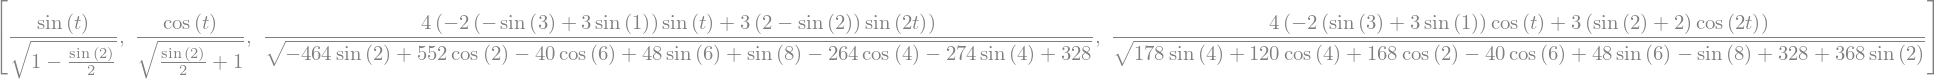

In [69]:
def inner(v,w):
    return (v.T*w)[0]
def inner2(f,g):
    return integrate(f*conjugate(g),(t,-1,1))
t = symbols('t')
B = [sin(t), cos(t), sin(2*t), cos(2*t)]
GramSchmidt = GramSchmidt2(B, inner2, normal = True)
GramSchmidt = [simplify(v) for v in GramSchmidt2(B, inner2, normal=True)]
display(GramSchmidt)

**Orthonormal check**

In [19]:
def orthonormal_check(v: list, inner: callable):
    for i in range(len(v)):
        for j in range(len(v)):
            if i != j:
                assert inner(v[i],v[j]) == 0
            else:
                assert inner(v[i],v[j]) == 1
    print("The basis is orthonormal")
# for O in [O_2, O_3]:
#     for i in range(len(O)):
#         for j in range(len(O)):
#             if i != j:
#                 assert inner(O[i],O[j]) == 0
#             else:
#                 assert inner(O[i],O[j]) == 1
# print("The basis is orthonormal")

**Example of polynomial representation**

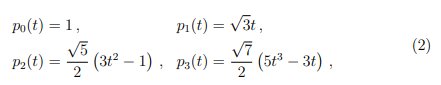

Simple solve


Rewriting the polynomials


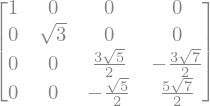

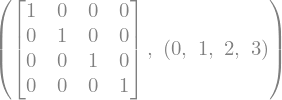

AssertionError: 

In [20]:
a0, a1, a2, a3 = symbols('a0 a1 a2 a3')
p0 = 1
p1 = sqrt(3)*t
p2 = sqrt(5) / 2 * (3*t**2 - 1)
p3 = sqrt(7) / 2 * (5*t**3 - 3*t)
print("Simple solve")
display(solve(a0*p0 + a1*p1 + a2*p2 + a3*p3, [a0, a1, a2, a3]))
print("Rewriting the polynomials")
v0 = Matrix([1, 0, 0, 0])
v1 = Matrix([0, sqrt(3), 0, 0])
v2 = Matrix([0, 0, sqrt(5)/2*3, -sqrt(5)/2])
v3 = Matrix([0, 0, -sqrt(7)/2*3, sqrt(7)/2*5])
v = Matrix.hstack(v0, v1, v2, v3)
display(v,v.rref())
def inner(f,g, variable = symbols('x')):
    return 1/2 * integrate(f*conjugate(g),(variable,-1,1))
orthonormal_check(v, inner)

In [21]:
inner(p0,p1)